In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

# single segment, planner

In [5]:
# target
alpha_target = 30  # radian

# parameters of the continuum robot
l_bb = 300      # length of the backbone, mm
n_s = 10        # number of the spacer disks
r_t = 10.5     # distance of tendon routing and backbone, mm

In [6]:
def convert_angle_to_radian(angle):
    radian_angle = angle * math.pi / 180
    return radian_angle

In [7]:
alpha_bb = convert_angle_to_radian(alpha_target)    # angle of backbone, radian
print("target angle: ", alpha_bb)
r_bb = l_bb / alpha_bb         # arch radius of backbone
print("radius of the backbone: ", r_bb)

# piecewise parameters between the spacer disks
alpha_p = alpha_bb / n_s
alpha_bb = l_bb / n_s / alpha_bb
l_sp = 2 * (r_bb - r_t) *  math.sin(alpha_p / 2)
l_s = n_s * l_sp

delta_l_s = l_bb - l_s
print("delta l_s: ", delta_l_s)

target angle:  0.5235987755982988
radius of the backbone:  572.9577951308232
delta l_s:  5.53142743000268


# calculate the motor angle

In [8]:
def convert_radian_to_degree(radian):
    degree = radian / math.pi * 180
    return degree

In [9]:
r_tendon = 0.3      # mm
r_router = 2.4585   # mm
r_td = r_tendon + r_router

theta_motor = delta_l_s / r_td
theta_motor = convert_radian_to_degree(theta_motor)
print("morot angle: ", theta_motor)

morot angle:  114.8912258191224


# Forward Kinematics

For the forward kinematics of the continuum robot (planner, single segment, single antagonistic tendon pair)

### Input: motor angle, $\phi$

### Output: continuum arm's curvature, $\alpha$

The mathematical relation between the input and output are:
$\Delta l_s = r_{td} \phi$ 

where the $\Delta l_s $ is the length of shorten tendon, and the $ r_{td} $  is the radius of the touter. Therefore, we can calculate the total length of the shorten tendon, which
$l_s = l_{bb} - \Delta l_s $

Since the length of the backbone and the shorten tendon has the following relations:

$l_{bb} = r_{bb} \theta$

$l_s = r_s \theta$

$r_{bb} = r_s + r_t$,
where the $\theta$ is the central angle (curvature) of the continuum robot

Therefore, we can get the relationship: $\Delta l_s = l_{bb} - l_s = r_t \times \theta$, which we can calculate the curvature.

In [10]:
# parameters of the setup
r_tendon = 0.3      # mm
r_router = 2.4585   # mm
r_td = r_tendon + r_router  ## mm

r_t = 10.5      # mm

# input
phi_input = -60      # target motor angle, in degree
phi = convert_angle_to_radian(phi_input)
print('phi: ',phi)

# base on the router's radius, calculate the shorten tendon's length
delta_l_s = r_td * phi
# print(delta_l_s)
theta_bb = delta_l_s / r_t
# theta_bb = convert_radian_to_degree(theta_bb)
print('theta_bb: ',theta_bb)


phi:  -1.0471975511965976
theta_bb:  -0.2751137566643632


curvature:  -0.009170458555478773


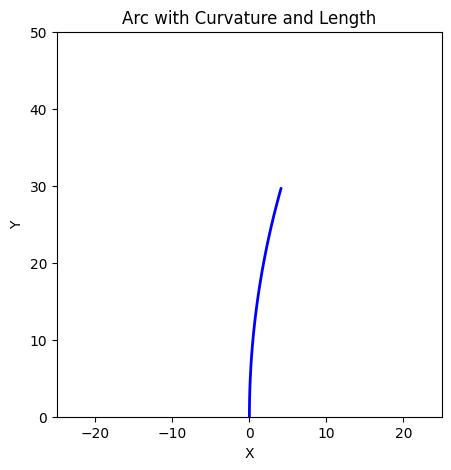

In [11]:
# plot the arc
import numpy as np
import matplotlib.pyplot as plt

# Define the arc parameters
arc_length = 30  # Length of the arc
curvature = theta_bb / arc_length  # Curvature of the arc (radius/length)
print('curvature: ', curvature)

# Calculate the start and end angles of the arc
start_angle = 0
end_angle = arc_length * curvature

# Create the x and y coordinates of the arc
theta = np.linspace(start_angle, end_angle, 100)
x = np.cos(theta) / curvature
y = np.sin(theta) / curvature

# Shift the arc to start at (0, 0)
x = x - x[0]
y = y - y[0]

# Create the figure and axis with a fixed size
fig, ax = plt.subplots(figsize=(5, 5))  # Set the figure size to 50x50

# Draw the arc
ax.plot(x, y, color='blue', linewidth=2)

# Set the aspect ratio to 'equal' to ensure the arc appears circular
ax.set_aspect('equal')

# Set the x and y limits to (0, 50)
ax.set_xlim(-25, 25)
ax.set_ylim(0, 50)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Arc with Curvature and Length')

# Show the plot
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# function to plot the arc
def plot_CR(curvature):
    arc_length = 30  # Length of the arc

# Calculate the start and end angles of the arc
    if curvature == 0:
        # If the curvature is 0, the arc is a straight line
        start_angle = 0
        end_angle = arc_length
    else:
        # Otherwise, calculate the start and end angles
        start_angle = 0
        end_angle = arc_length * curvature

    # Create the x and y coordinates of the arc
    if curvature == 0:
        # If the curvature is 0, the arc is a straight line
        y = np.linspace(0, arc_length, 100)
        x = np.zeros_like(y)
    else:
        # Otherwise, create the arc coordinates
        theta = np.linspace(start_angle, end_angle, 100)
        x = np.cos(theta) / curvature
        y = np.sin(theta) / curvature

    # Shift the arc to start at (0, 0)
    x = x - x[0]
    y = y - y[0]

    # Create the figure and axis with a fixed size
    fig, ax = plt.subplots(figsize=(5, 5))  # Set the figure size to 50x50

    # Draw the arc
    ax.plot(x, y, color='blue', linewidth=2)

    # Set the aspect ratio to 'equal' to ensure the arc appears circular
    ax.set_aspect('equal')

    # Set the x and y limits to (0, 50)
    ax.set_xlim(-25, 25)
    ax.set_ylim(0, 50)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Arc with Curvature and Length')

    # Show the plot
    plt.show()

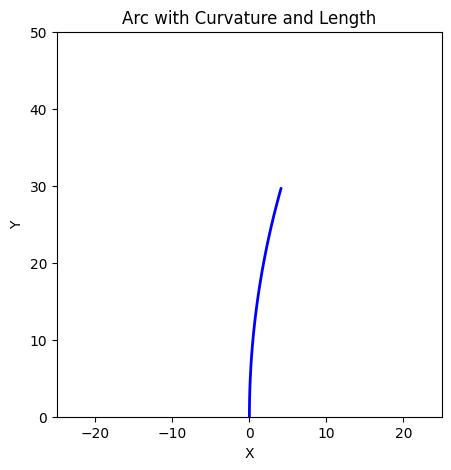

In [13]:
# test the function
curvature = theta_bb / arc_length  # Curvature of the arc (radius/length)
plot_CR(curvature)

curvature1 -0.018340917110957547
curvature2 0.018340917110957547


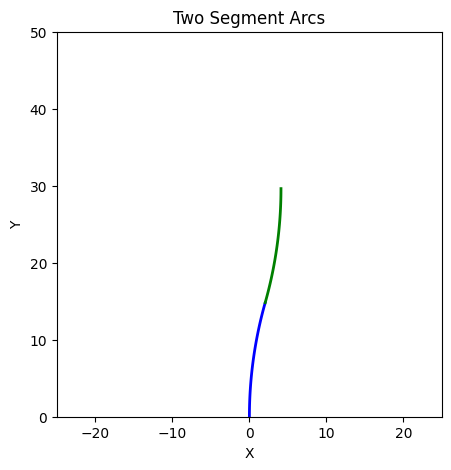

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the arc parameters
arc_length1 = 15  # Length of the first arc
curvature1 = theta_bb / arc_length1  # Curvature of the arc (radius/length)
arc_length2 = 15  # Length of the second arc
curvature2 = - theta_bb / arc_length2  # Curvature of the arc (radius/length)
print("curvature1", curvature1)
print("curvature2", curvature2)

# Calculate the start and end angles of the arcs
start_angle1 = 0
end_angle1 = start_angle1 + arc_length1 * curvature1
start_angle2 = end_angle1
end_angle2 = start_angle2 + arc_length2 * curvature2

# Create the x and y coordinates of the first arc
theta1 = np.linspace(start_angle1, end_angle1, 100)
x1 = np.cos(theta1) / curvature1
y1 = np.sin(theta1) / curvature1

# Create the x and y coordinates of the second arc
theta2 = np.linspace(start_angle2, end_angle2, 100)
x2 = np.cos(theta2) / curvature2 + x1[-1]
y2 = np.sin(theta2) / curvature2 + y1[-1]

# Shift the arc to start at (0, 0)
x1 = x1 - x1[0]
y1 = y1 - y1[0]
x2 = x2 - x2[0]
y2 = y2 - y2[0]
x2 = x2 + x1[-1]
y2 = y2 + y1[-1]

# Create the figure and axis with a fixed size
fig, ax = plt.subplots(figsize=(5, 5))

# Draw the arcs
ax.plot(x1, y1, color='blue', linewidth=2)
ax.plot(x2, y2, color='green', linewidth=2)

# Set the aspect ratio to 'equal' to ensure the arcs appear circular
ax.set_aspect('equal')

# Set the x and y limits to (0, 50)
ax.set_xlim(-25, 25)
ax.set_ylim(0,  50)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two Segment Arcs')

# Show the plot
plt.show()

## check the curvature input (in case it is 0), and run the same function for dual segment CR

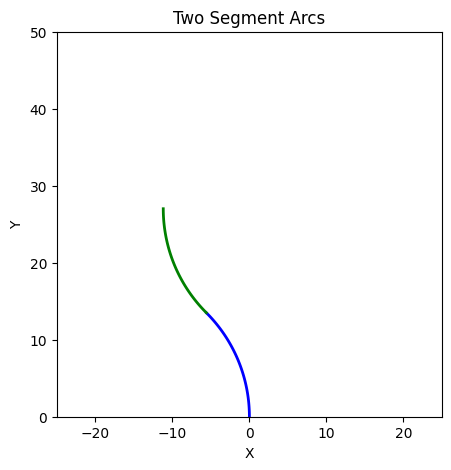

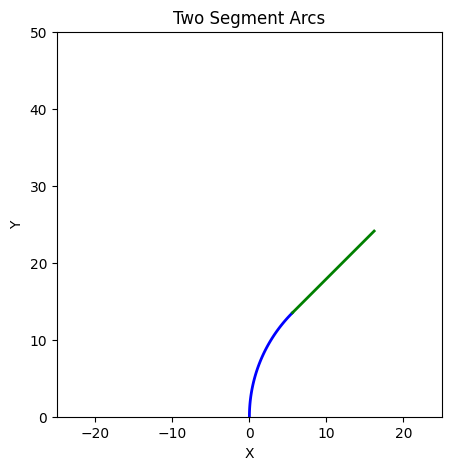

In [15]:
def plot_Dual_CR(curvature1, curvature2):
    '''
    The inputs of this function are the curvatures of the first and second segment
    the curvature can be calculated by: curvature = theta_bb / arc_length
    Unit: Curvature of the arc (radius/length)
    '''
    # Define the arc parameters
    arc_length1 = 15  # Length of the first arc
    arc_length2 = 15  # Length of the second arc
    
    if curvature1 == 0:
        start_angle1 = 0
        end_angle1 = 0
        # If the curvature is 0, the arc is a straight line
        x1 = np.zeros_like(np.linspace(0, arc_length1, 100))
        y1 = np.linspace(0, arc_length1, 100)
    else:
        # Otherwise, calculate the start and end angles
        start_angle1 = 0
        end_angle1 = arc_length1 * curvature1
        theta1 = np.linspace(start_angle1, end_angle1, 100)
        x1 = np.cos(theta1) / curvature1
        y1 = np.sin(theta1) / curvature1  
        
    if curvature2 == 0:
        start_angle2 = end_angle1
        end_angle2 = start_angle2
        # Create the x and y coordinates of the second arc
        x2 = np.zeros_like(np.linspace(0, arc_length2, 100))
        y2 = np.linspace(0, arc_length2, 100) + y1[-1]
        # Rotate the second segment by 30 degrees along the z-axis
        angle = start_angle2  # 30 degrees in radians
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
        rotated_coords = np.dot(rotation_matrix, [x2, y2])
        x2 = rotated_coords[0]
        y2 = rotated_coords[1]
    else:
        # Otherwise, calculate the start and end angles
        start_angle2 = end_angle1
        end_angle2 = start_angle2 + arc_length2 * curvature2
        theta2 = np.linspace(start_angle2, end_angle2, 100)
        x2 = np.cos(theta2) / curvature2
        y2 = np.sin(theta2) / curvature2  

        # Shift the arc to start at (0, 0)
    x1 = x1 - x1[0]
    y1 = y1 - y1[0]
    x2 = x2 - x2[0]
    y2 = y2 - y2[0]
    x2 = x2 + x1[-1]
    y2 = y2 + y1[-1]

    # Create the figure and axis with a fixed size
    fig, ax = plt.subplots(figsize=(5, 5))

    # Draw the arcs
    ax.plot(x1, y1, color='blue', linewidth=2)
    ax.plot(x2, y2, color='green', linewidth=2)

    # Set the aspect ratio to 'equal' to ensure the arcs appear circular
    ax.set_aspect('equal')

    # Set the x and y limits to (0, 50)
    ax.set_xlim(-25, 25)
    ax.set_ylim(0,  50)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Two Segment Arcs')

    # Show the plot
    plt.show()
    
plot_Dual_CR(0.05235987755982988, -0.05235987755982988)
plot_Dual_CR(-0.05235987755982988, 0)

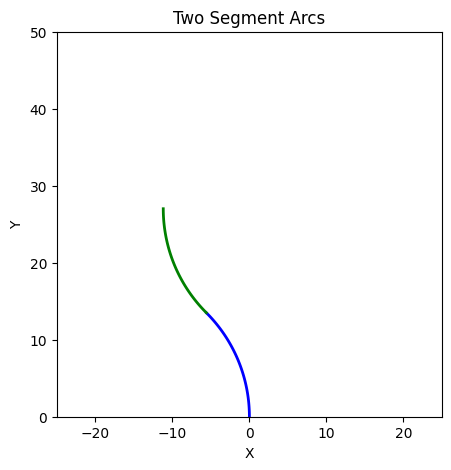

In [16]:
# Define the arc parameters
arc_length1 = 15  # Length of the first arc
theta_bb = np.pi / 4  # Central angle (in radians)
if theta_bb == 0:
    # If the central angle is 0, the arcs are straight lines
    curvature1 = 0
    curvature2 = 0
else:
    # Otherwise, calculate the curvatures
    curvature1 = theta_bb / arc_length1  # Curvature of the first arc (radius/length)
    curvature2 = - theta_bb / arc_length1  # Curvature of the second arc (radius/length)

arc_length2 = 15  # Length of the second arc

# Calculate the start and end angles of the arcs
start_angle1 = 0
end_angle1 = start_angle1 + arc_length1 * curvature1
start_angle2 = end_angle1
end_angle2 = start_angle2 + arc_length2 * curvature2

# Create the x and y coordinates of the first arc
theta1 = np.linspace(start_angle1, end_angle1, 100)
x1 = np.cos(theta1) / curvature1
y1 = np.sin(theta1) / curvature1

# Create the x and y coordinates of the second arc
theta2 = np.linspace(start_angle2, end_angle2, 100)
x2 = np.cos(theta2) / curvature2 + x1[-1]
y2 = np.sin(theta2) / curvature2 + y1[-1]

# Shift the arc to start at (0, 0)
x1 = x1 - x1[0]
y1 = y1 - y1[0]
x2 = x2 - x2[0]
y2 = y2 - y2[0]
x2 = x2 + x1[-1]
y2 = y2 + y1[-1]

# Create the figure and axis with a fixed size
fig, ax = plt.subplots(figsize=(5, 5))

# Draw the arcs
ax.plot(x1, y1, color='blue', linewidth=2)
ax.plot(x2, y2, color='green', linewidth=2)

# Set the aspect ratio to 'equal' to ensure the arcs appear circular
ax.set_aspect('equal')

# Set the x and y limits to (-25, 25) and (0, 50)
ax.set_xlim(-25, 25)
ax.set_ylim(0, 50)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Two Segment Arcs')

# Show the plot
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the arc in 3D
def plot_CR_3D(curvature, phi):
    arc_length = 30  # Length of the arc

# Calculate the start and end angles of the arc
    if curvature == 0:
        # If the curvature is 0, the arc is a straight line
        start_angle = 0
        end_angle = arc_length
        # If the curvature is 0, the arc is a straight line
        x = np.zeros_like(np.linspace(0, arc_length, 100))
        y = np.zeros_like(np.linspace(0, arc_length, 100))
        z = np.linspace(0, arc_length, 100)
    else:
        # Otherwise, calculate the start and end angles
        start_angle = 0
        end_angle = arc_length * curvature
        theta = np.linspace(start_angle, end_angle, 100)
        x = np.cos(theta) / curvature
        y = np.zeros_like(np.linspace(0, arc_length, 100))
        z = np.sin(theta) / curvature
        
    # Shift the arc to start at (0, 0)
    x = x - x[0]
    y = y - y[0]
    z = z - z[0]
    
    print('before rotating',[x[0], y[0], z[0]])

    # Rotate the arc around the z-axis by angle phi
    x_rotated = x * np.cos(phi) - y * np.sin(phi)
    y_rotated = x * np.sin(phi) + y * np.cos(phi)

    # Shift the arc to start at (0, 0, 0)
    x_rotated = x_rotated - x_rotated[0]
    y_rotated = y_rotated - y_rotated[0]
    z = z - z[0]
    
    print('after rotating',[x_rotated[0], y_rotated[0], z[0]])

    # Create the figure and 3D axis
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the arc in 3D
    ax.plot(x_rotated, y_rotated, z, color='blue', linewidth=2)

    # Set the x, y, and z limits
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_zlim(0, 35)

    # # Set the aspect ratio to 'equal' by adjusting the data limits
    # max_range = np.array([x_rotated.max() - x_rotated.min(), 
    #                       y_rotated.max() - y_rotated.min(),
    #                      z.max() - z.min()]).max() / 2.0

    # mid_x = (x_rotated.max() + x_rotated.min()) / 2
    # mid_y = (y_rotated.max() + y_rotated.min()) / 2
    # mid_z = (z.max() + z.min()) / 2
    # ax.set_xlim(mid_x - max_range, mid_x + max_range)
    # ax.set_ylim(mid_y - max_range, mid_y + max_range)
    # ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Arc with Curvature and Length')

    # Show the plot
    plt.show()

before rotating [0.0, 0.0, 0.0]
after rotating [0.0, 0.0, 0.0]


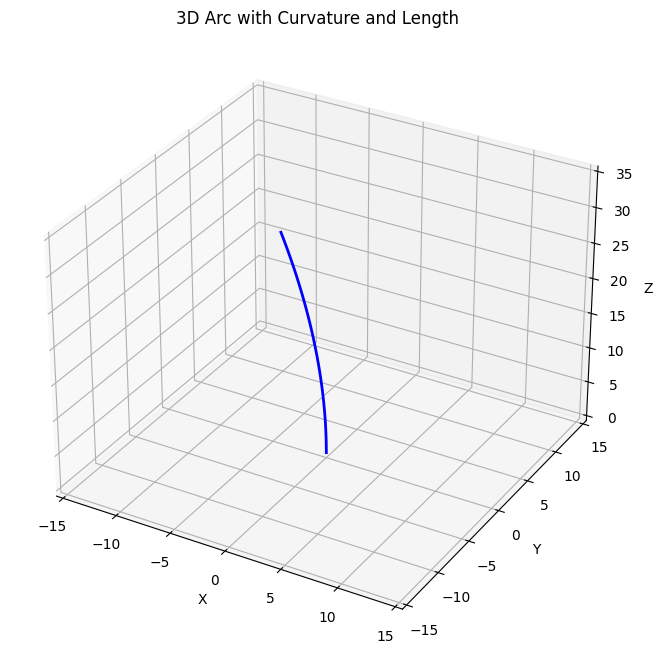

In [18]:
plot_CR_3D(0.009170458555478773, 0)

first shift of the first segment:  [0.0, 0.0, 0.0]
beginning of the first segment:  [0.0, 0.0, 0.0]
end of the first segment:  [-0.7283559340815087, -0.7283559340815086, 14.95273999766383]
beginning of the second segment:  [0.0, 0.0, 0.0]
new beginning of the second segment:  [-0.7283559340815087, -0.7283559340815086, 14.95273999766383]


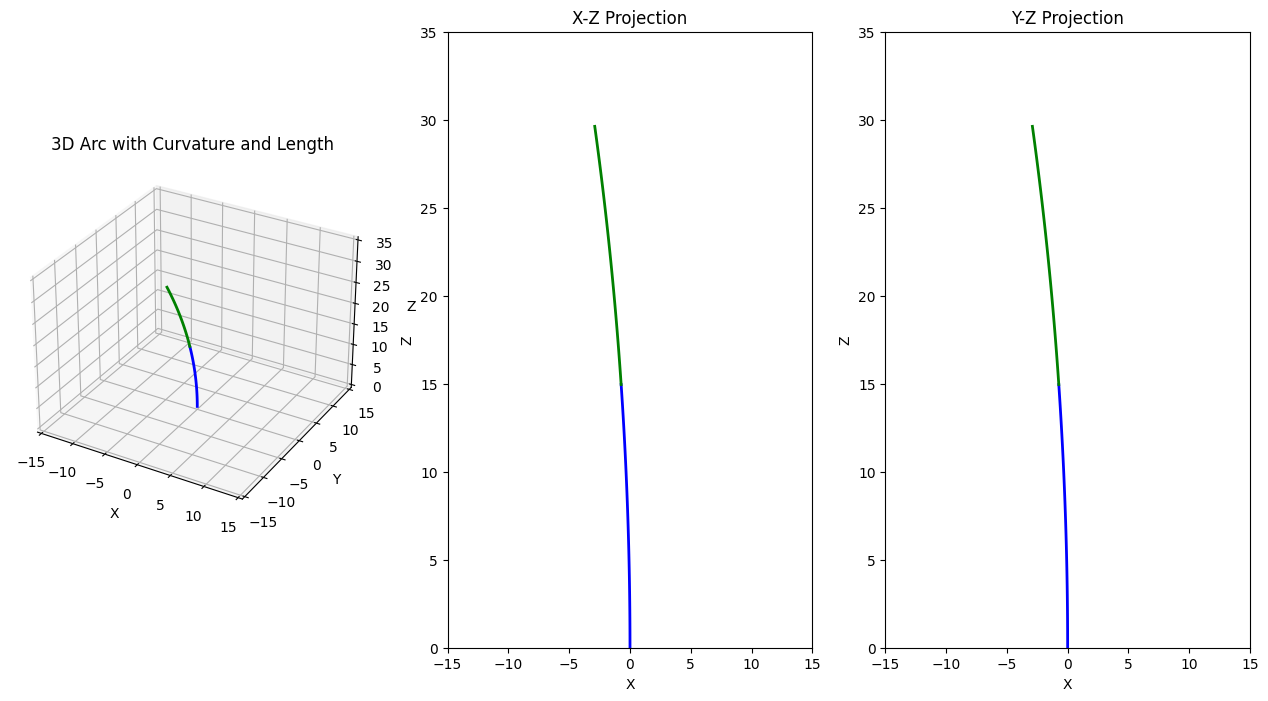

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the arc in 3D
def plot_CR_Dual_3D(curvature1, phi1, curvature2, phi2):
    '''
    The inputs of this function are the curvatures of the first and second segment
    the curvature can be calculated by: curvature = theta_bb / arc_length
    Unit: Curvature of the arc (radius/length)
    '''
    # Define the arc parameters
    arc_length1 = 15  # Length of the first arc
    arc_length2 = 15  # Length of the second arc

    # Calculate the start and end angles of the arc
    if curvature1 == 0:
        # If the curvature is 0, the arc is a straight line
        start_angle1 = 0
        end_angle1 = arc_length1
        # If the curvature is 0, the arc is a straight line
        x1 = np.zeros_like(np.linspace(0, arc_length1, 100))
        y1 = np.zeros_like(np.linspace(0, arc_length1, 100))
        z1 = np.linspace(0, arc_length1, 100)
    else:
        # Otherwise, calculate the start and end angles
        start_angle1 = 0
        end_angle1 = arc_length1 * curvature1
        theta1 = np.linspace(start_angle1, end_angle1, 100)
        x1 = np.cos(theta1) / curvature1
        y1 = np.zeros_like(np.linspace(0, arc_length1, 100))
        z1 = np.sin(theta1) / curvature1
        
    # Shift the arc to start at (0, 0)
    x1 = x1 - x1[0]
    y1 = y1 - y1[0]
    z1 = z1 - z1[0]
    
    print('first shift of the first segment: ', [x1[0], y1[0], z1[0]])

    R1 = np.array([[np.cos(phi1), -np.sin(phi1), 0],
                [np.sin(phi1),  np.cos(phi1), 0],
                [0,            0,            1]])

    # Rotate the arc using the 3D rotation matrix
    segment1_rotated = np.dot(R1, [x1, y1, z1])
    x1 = segment1_rotated[0]
    y1 = segment1_rotated[1]
    z1 = segment1_rotated[2]
    
    print("beginning of the first segment: ", [x1[0], y1[0], z1[0]])
    print("end of the first segment: ", [x1[-1], y1[-1], z1[-1]])
    
    if curvature2 == 0:
        # If the curvature is 0, the arc is a straight line
        start_angle2 = end_angle1
        end_angle2 = start_angle2
        # If the curvature is 0, the arc is a straight line
        x2 = np.zeros_like(np.linspace(0, arc_length2, 100))
        y2 = np.zeros_like(np.linspace(0, arc_length2, 100))
        z2 = np.linspace(0, arc_length2, 100)
        # Rotate the second segment by 30 degrees along the y-axis
        angle = start_angle2
        rotation_matrix = np.array([[np.cos(angle), 0, np.sin(angle)],
                                [0, 1, 0],
                                [-np.sin(angle), 0, np.cos(angle)]])
        rotated_coords = np.dot(rotation_matrix, [x2, y2, z2])
        x2 = rotated_coords[0]
        y2 = rotated_coords[1]
        z2 = rotated_coords[2]
    else:
        # Otherwise, calculate the start and end angles
        start_angle2 = end_angle1
        end_angle2 = start_angle2 + arc_length2 * curvature2
        theta2 = np.linspace(start_angle2, end_angle2, 100)
        x2 = np.cos(theta2) / curvature2
        y2 = np.zeros_like(np.linspace(0, arc_length2, 100))
        z2 = np.sin(theta2) / curvature2
        
    # Shift the arc to start at (0, 0)
    x2 = x2 - x2[0]
    y2 = y2 - y2[0]
    z2 = z2 - z2[0]

    print("beginning of the second segment: ", [x2[0], y2[0], z2[0]])
    # Define the 3D rotation matrix for rotation around the z-axis
    R2 = np.array([[np.cos(phi2), -np.sin(phi2), 0],
                [np.sin(phi2),  np.cos(phi2), 0],
                [0,            0,            1]])

    # Rotate the arc using the 3D rotation matrix
    segment2_rotated = np.dot(R2, [x2, y2, z2])
    x2 = segment2_rotated[0]
    y2 = segment2_rotated[1]
    z2 = segment2_rotated[2]

    # Shift the arc to the end of the first segment
    x2 = x2 + x1[-1]
    y2 = y2 + y1[-1]
    z2 = z2 + z1[-1]
    
    print("new beginning of the second segment: ", [x2[0], y2[0], z2[0]])

        # Create the figure and 3D axis
    fig = plt.figure(figsize=(16, 8))
    # 3D plot
    ax = fig.add_subplot(1, 3, 1, projection='3d')

    # Plot the arc in 3D
    ax.plot(x1, y1, z1, color='blue', linewidth=2)
    ax.plot(x2, y2, z2, color='green', linewidth=2)

    # Set the x, y, and z limits
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_zlim(0, 35)

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Arc with Curvature and Length')

    # X-Z projection
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(x1, z1, color='blue', linewidth=2)
    ax2.plot(x2, z2, color='green', linewidth=2)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Z')
    ax2.set_title('X-Z Projection')
    
    # Set the x, y, and z limits
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(0, 35)
    
    # Y-Z projection
    ax2 = fig.add_subplot(1, 3, 3)
    ax2.plot(y1, z1, color='blue', linewidth=2)
    ax2.plot(y2, z2, color='green', linewidth=2)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Z')
    ax2.set_title('Y-Z Projection')
    
    # Set the x, y, and z limits
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(0, 35)

    # Show the plot
    plt.show()
    
plot_CR_Dual_3D(0.009170458555478773,  np.pi /4 , 0.009170458555478773, np.pi / 4)

## What have I done in the previous function:

From the given curvatures and phi (angle of the rotated plane), plot the continuum robot.

first shift of the first segment:  [0.0, 0.0, 0.0]
beginning of the first segment:  [0.0, 0.0, 0.0]
end of the first segment:  [0.0, 0.0, 15.0]
Start angle 2:  15
beginning of the second segment:  [0.0, 0.0, 0.0]
new beginning of the second segment:  [0.0, 0.0, 15.0]


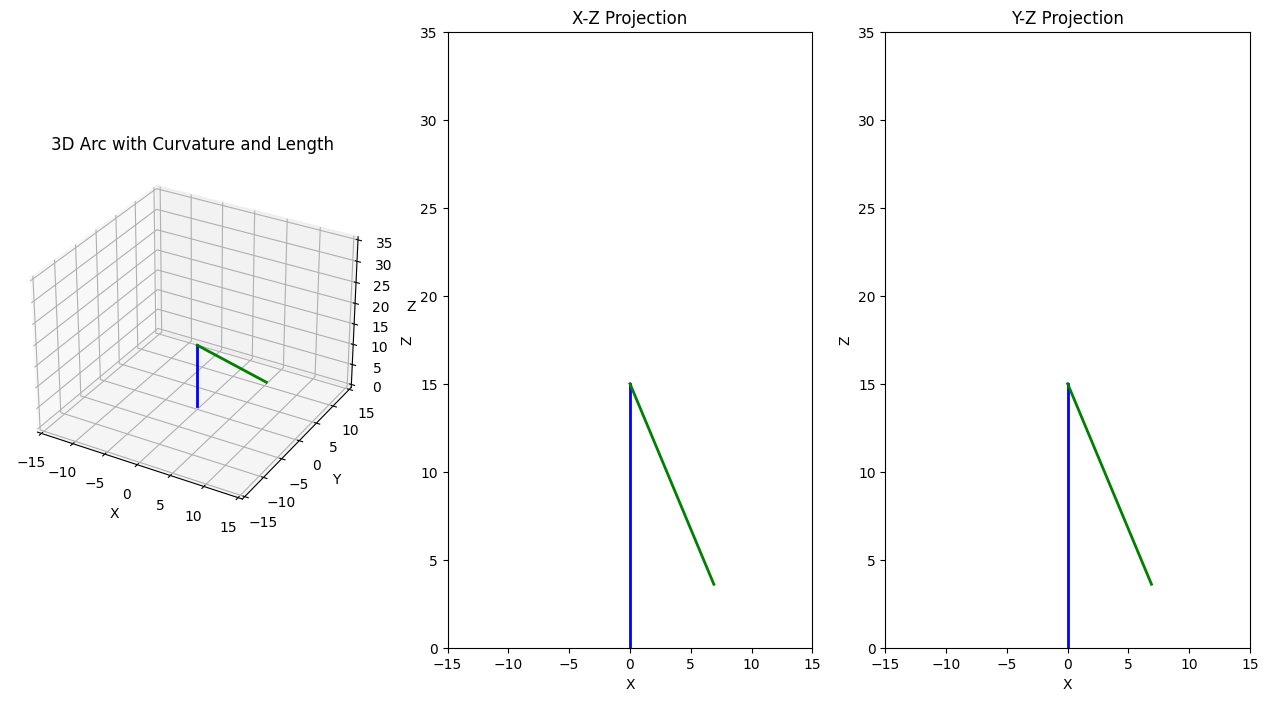

In [27]:
# curvature1 = 0.009170458555478773
curvature1 = 0
phi1 = np.pi /4 
# curvature2 = 0.009170458555478773
curvature2 = 0
phi2 = np.pi / 4

# draw the backbone
# Define the arc parameters
arc_length1 = 15  # Length of the first arc
arc_length2 = 15  # Length of the second arc

# Calculate the start and end angles of the arc
if curvature1 == 0:
    # If the curvature is 0, the arc is a straight line
    start_angle1 = 0
    end_angle1 = start_angle1
    # If the curvature is 0, the arc is a straight line
    x1 = np.zeros_like(np.linspace(0, arc_length1, 100))
    y1 = np.zeros_like(np.linspace(0, arc_length1, 100))
    z1 = np.linspace(0, arc_length1, 100)
else:
    # Otherwise, calculate the start and end angles
    start_angle1 = 0
    end_angle1 = arc_length1 * curvature1
    theta1 = np.linspace(start_angle1, end_angle1, 100)
    x1 = np.cos(theta1) / curvature1
    y1 = np.zeros_like(np.linspace(0, arc_length1, 100))
    z1 = np.sin(theta1) / curvature1

# Shift the arc to start at (0, 0)
x1 = x1 - x1[0]
y1 = y1 - y1[0]
z1 = z1 - z1[0]

print('first shift of the first segment: ', [x1[0], y1[0], z1[0]])

R1 = np.array([[np.cos(phi1), -np.sin(phi1), 0],
            [np.sin(phi1),  np.cos(phi1), 0],
            [0,            0,            1]])

# Rotate the arc using the 3D rotation matrix
segment1_rotated = np.dot(R1, [x1, y1, z1])
x1 = segment1_rotated[0]
y1 = segment1_rotated[1]
z1 = segment1_rotated[2]

print("beginning of the first segment: ", [x1[0], y1[0], z1[0]])
print("end of the first segment: ", [x1[-1], y1[-1], z1[-1]])

if curvature2 == 0:
    # If the curvature is 0, the arc is a straight line
    start_angle2 = end_angle1
    print("Start angle 2: ", start_angle2)
    end_angle2 = start_angle2
    # If the curvature is 0, the arc is a straight line
    x2 = np.zeros_like(np.linspace(0, arc_length2, 100))
    y2 = np.zeros_like(np.linspace(0, arc_length2, 100))
    z2 = np.linspace(0, arc_length2, 100)
    # Rotate the second segment by 30 degrees along the y-axis
    angle = start_angle2
    rotation_matrix = np.array([[np.cos(angle), 0, np.sin(angle)],
                            [0, 1, 0],
                            [-np.sin(angle), 0, np.cos(angle)]])
    rotated_coords = np.dot(rotation_matrix, [x2, y2, z2])
    x2 = rotated_coords[0]
    y2 = rotated_coords[1]
    z2 = rotated_coords[2]
else:
    # Otherwise, calculate the start and end angles
    start_angle2 = end_angle1
    end_angle2 = start_angle2 + arc_length2 * curvature2
    theta2 = np.linspace(start_angle2, end_angle2, 100)
    x2 = np.cos(theta2) / curvature2
    y2 = np.zeros_like(np.linspace(0, arc_length2, 100))
    z2 = np.sin(theta2) / curvature2

# Shift the arc to start at (0, 0)
x2 = x2 - x2[0]
y2 = y2 - y2[0]
z2 = z2 - z2[0]

print("beginning of the second segment: ", [x2[0], y2[0], z2[0]])
# Define the 3D rotation matrix for rotation around the z-axis
R2 = np.array([[np.cos(phi2), -np.sin(phi2), 0],
            [np.sin(phi2),  np.cos(phi2), 0],
            [0,            0,            1]])

# Rotate the arc using the 3D rotation matrix
segment2_rotated = np.dot(R2, [x2, y2, z2])
x2 = segment2_rotated[0]
y2 = segment2_rotated[1]
z2 = segment2_rotated[2]

# Shift the arc to the end of the first segment
x2 = x2 + x1[-1]
y2 = y2 + y1[-1]
z2 = z2 + z1[-1]

print("new beginning of the second segment: ", [x2[0], y2[0], z2[0]])

# Create the figure and 3D axis
fig = plt.figure(figsize=(16, 8))
# 3D plot
ax = fig.add_subplot(1, 3, 1, projection='3d')

# Plot the arc in 3D
ax.plot(x1, y1, z1, color='blue', linewidth=2)
ax.plot(x2, y2, z2, color='green', linewidth=2)

# Set the x, y, and z limits
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(0, 35)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Arc with Curvature and Length')

# X-Z projection
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x1, z1, color='blue', linewidth=2)
ax2.plot(x2, z2, color='green', linewidth=2)
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_title('X-Z Projection')

# Set the x, y, and z limits
ax2.set_xlim(-15, 15)
ax2.set_ylim(0, 35)

# Y-Z projection
ax2 = fig.add_subplot(1, 3, 3)
ax2.plot(y1, z1, color='blue', linewidth=2)
ax2.plot(y2, z2, color='green', linewidth=2)
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_title('Y-Z Projection')

# Set the x, y, and z limits
ax2.set_xlim(-15, 15)
ax2.set_ylim(0, 35)

# Show the plot
plt.show()